In [1]:
import matplotlib.pyplot as plt
import torch, torchvision
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import cv2

In [2]:
T=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_data=torchvision.datasets.MNIST('mnist_data',train=True,transform=T,download=True)  
mnist_test=torchvision.datasets.MNIST('mnist_data',train=False,transform=T,download=True)  

mnist_dataloader= torch.utils.data.DataLoader(mnist_data,batch_size=1000)
mnist_testloader= torch.utils.data.DataLoader(mnist_test,batch_size=1000)

In [3]:
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.encoder=nn.Sequential(nn.Linear(28*28,100),nn.ReLU())
        self.decoder=nn.Sequential(nn.Linear(100,10),nn.Softmax())


    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [4]:
model=net().float()
print(model)
loss=nn.MSELoss()
params=model.parameters()
opt=optim.SGD(params=params, lr=0.01, momentum = 0.9)

net(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): Softmax()
  )
)


In [5]:
def change(labels):
    size,length=labels.shape
    x=torch.zeros(size,10)
    for i in range (size):
        k=labels[i].cpu().numpy()
        x[i,k]=1
    return x

In [6]:
n_epochs=70
for e in range(n_epochs):
    print('\n',e)
    for i,(images,labels) in enumerate(mnist_dataloader):
        images=Variable(images.view(images.size(0),-1))
        labels=Variable(labels.view(labels.size(0),-1))
        labels=change(labels)
        output=model(images)
        model.zero_grad()
        l=loss(output,labels)
        l.backward()
        opt.step()
        print(i,end=" ")



 0
0 

/usr/local/lib/python3.5/dist-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 4

In [7]:
for i,(images,labels) in enumerate(mnist_dataloader):
    images=images.view(images.size(0),-1)
    labels=labels.view(labels.size(0),-1)
    output=model(images)

/usr/local/lib/python3.5/dist-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [8]:
images=images.data.view(-1,28,28)
print(output[0])

tensor([ 0.0095,  0.0001,  0.0271,  0.0004,  0.0244,  0.0102,  0.9194,
         0.0011,  0.0038,  0.0041])


In [9]:
def show(x):
    x=x.detach().numpy()
    maximum=0
    for i in range (10):
        if(x[i]>maximum):
            out=i
            maximum=x[i]
    return out, maximum*100    

6 93.18580627441406


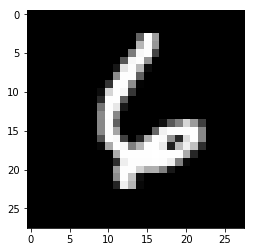

8 62.618374824523926


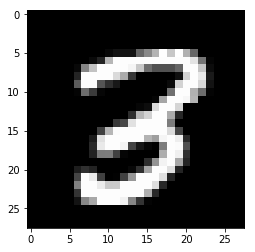

5 86.63501143455505


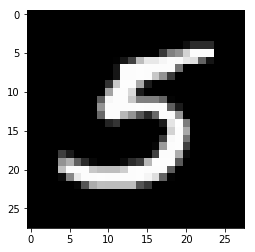

7 92.58341789245605


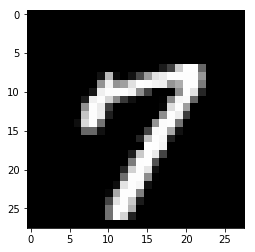

2 99.59440231323242


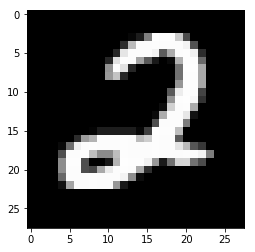

5 51.786619424819946


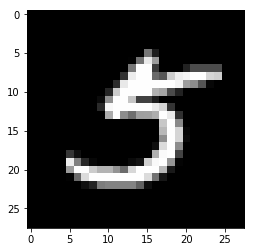

9 88.4240448474884


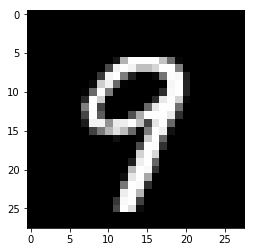

2 96.86046242713928


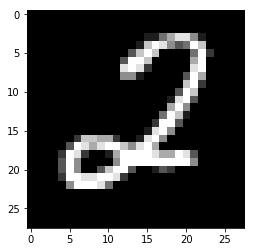

6 98.23731184005737


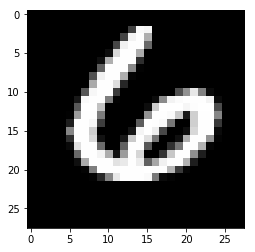

2 98.49066138267517


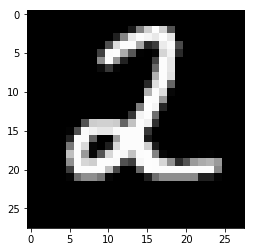

1 93.70651245117188


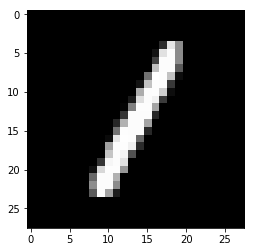

2 99.68275427818298


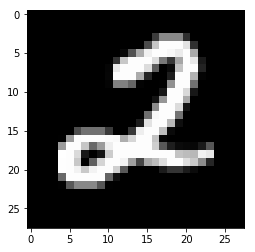

0 99.13028478622437


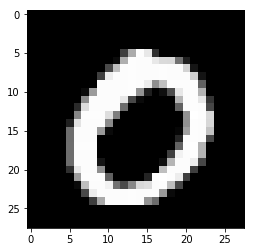

8 95.95086574554443


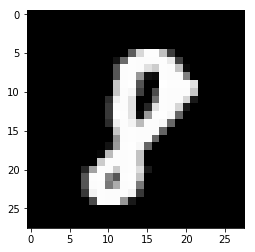

3 97.25468158721924


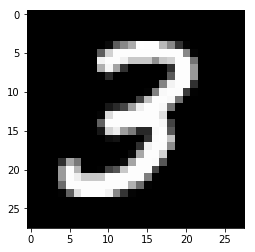

In [16]:
for i in range (15):
    out, maximum=show(output[i])
    print(out,maximum)
    img2=np.array(images.detach().numpy())[i]
    plt.imshow(img2,cmap='gray')
    plt.show()
    plt.close()